# Walmart Case Study

## Problem Statement:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores in the United States. Walmart has more than 100 million customers worldwide. The Management team at Walmart Inc. has below objectives:

To analyze the customer purchase behavior (precisely, purchase amount) against the various factors like customer’s gender, marital status, age etc to help the business make better decisions. 

To understand if the spending habits differ between male and female customers or if it differs from perople of different age groups. Based on the insights of this analysis, recommendations can be given for future customers.



## Basic Overview of Dataset

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# Read the txt file 

df = pd.read_csv('walmart_data.txt')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
# Datatype of all columns is as follows:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
# shape of data shows the rows and columns of the dataset

df.shape

(550068, 10)

In [6]:
# check for null values 

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no missing values present in the dataset

In [7]:
# Checking for duplicate rows -
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape[0])

0


No duplicate rows are found

In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [10]:
df.describe(include = 'object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


## Detecting Outliers

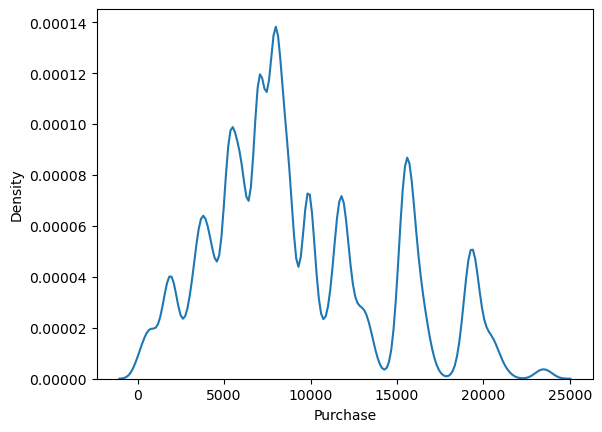

In [11]:
sns.kdeplot(data=df, x='Purchase')
plt.show()

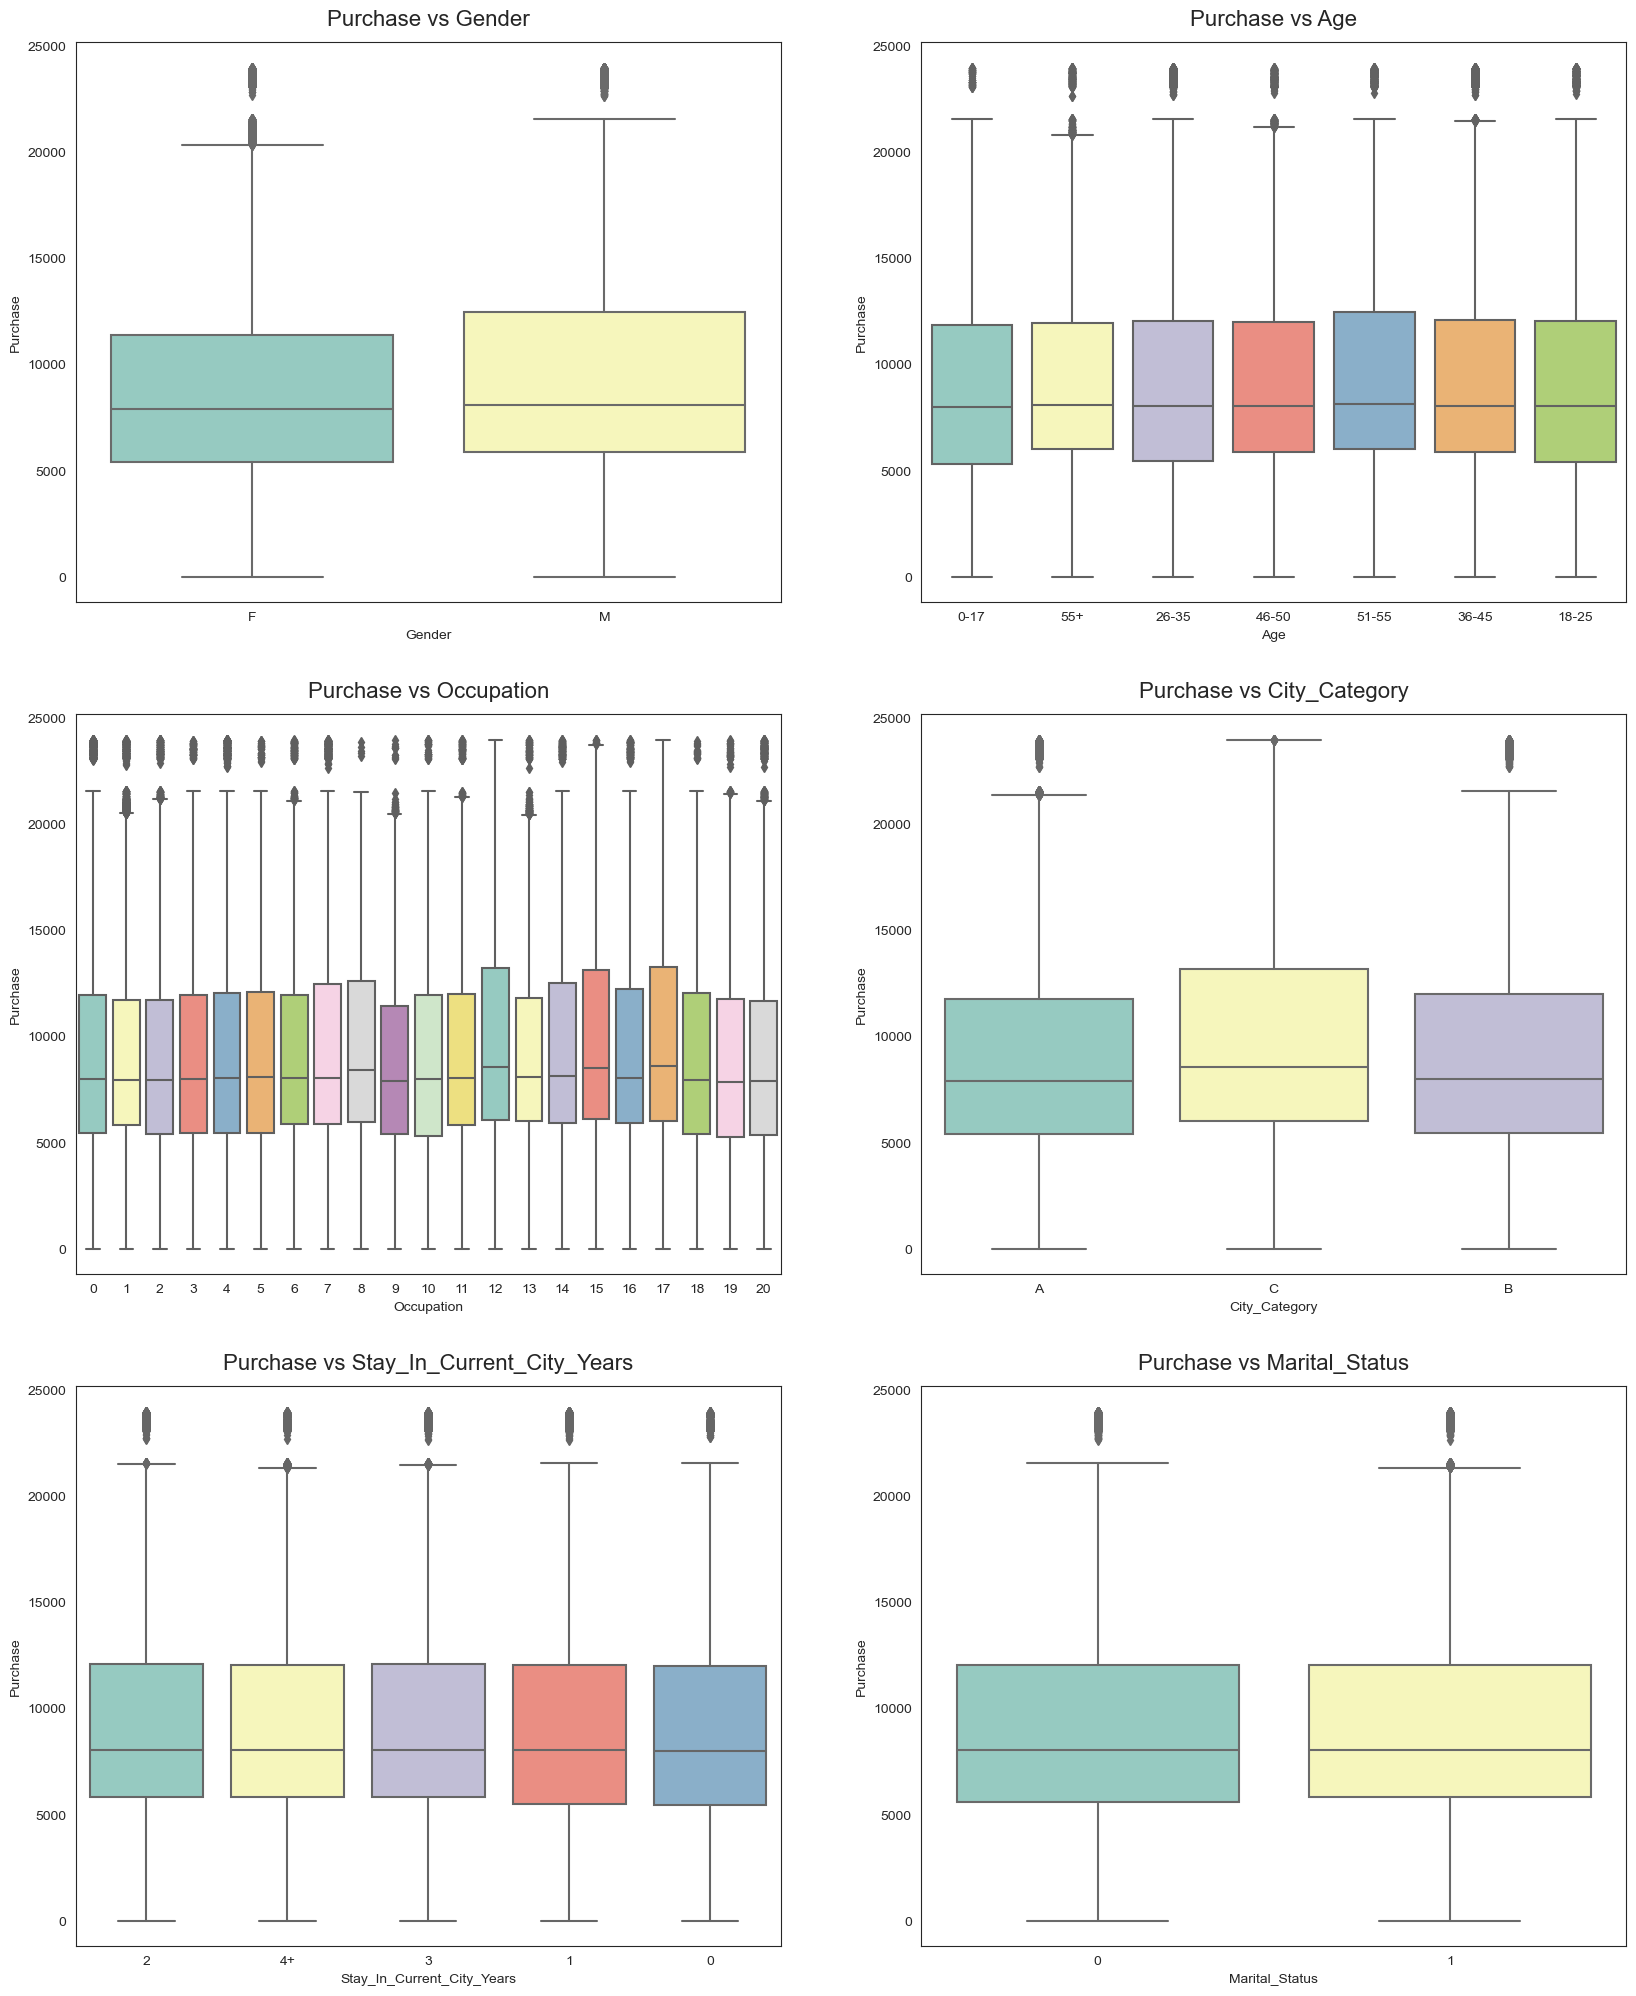

In [12]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=16)
        count += 1
plt.show()


In [13]:
q1=df.Purchase.quantile(0.25)
q3=df.Purchase.quantile(0.75)
print('q1:', q1, '\n' 'q3:',q3)
IQR=q3-q1
outliers = df[((df.Purchase<(q1-1.5*IQR)) | (df.Purchase>(q3+1.5*IQR)))]
print("num of outliers : ",len(outliers))
print("percent outliers : ",np.round(len(outliers) * 100/len(df),2))

q1: 5823.0 
q3: 12054.0
num of outliers :  2677
percent outliers :  0.49


0.49 % of the data is as outliers, lets's remove the same.

In [14]:
data =df.drop(df[ (df.Purchase > (q3+1.5*IQR)) | (df.Purchase < (q1-1.5*IQR)) ].index)

In [15]:
df=data.reset_index()

In [16]:
# Statistical summary of the dataset -
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,547391.0,NaN,NaN,NaN,275045.736771,158805.5206,0.0,137522.5,275043.0,412572.5,550067.0
User_ID,547391.0,NaN,NaN,NaN,1003028.432583,1727.356809,1000001.0,1001516.0,1003075.0,1004478.0,1006040.0
Product_ID,547391,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,547391,2,M,412171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,547391,7,26-35,218661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,547391.0,NaN,NaN,NaN,8.074627,6.521586,0.0,2.0,7.0,14.0,20.0
City_Category,547391,3,B,230114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,547391,5,1,192845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,547391.0,NaN,NaN,NaN,0.409486,0.491739,0.0,0.0,0.0,1.0,1.0
Product_Category,547391.0,NaN,NaN,NaN,5.378945,3.927383,1.0,1.0,5.0,8.0,20.0


## Data Exploration

In [17]:
df['User_ID'].nunique()

5891

In [18]:
df['Product_ID'].nunique()

3631

5891 unique users have bought 3631 unique products

#### Data distribution for each categorical variable

In [19]:
df.Gender.value_counts(normalize = True) *100

M    75.297365
F    24.702635
Name: Gender, dtype: float64

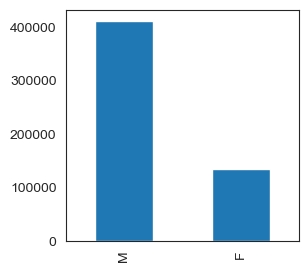

In [20]:
df.Gender.value_counts().plot(kind = 'bar', figsize = (3,3))
plt.show()

In [21]:
df.Age.value_counts(normalize = True) *100

26-35    39.946035
36-45    19.987358
18-25    18.146809
46-50     8.301561
51-55     6.976914
55+       3.895205
0-17      2.746117
Name: Age, dtype: float64

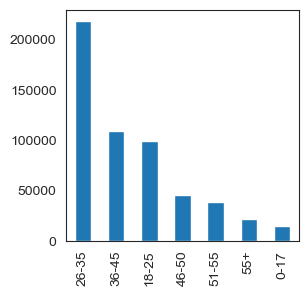

In [22]:
df.Age.value_counts().plot(kind = 'bar', figsize = (3,3))
plt.show()

In [23]:
df.Stay_In_Current_City_Years.value_counts(normalize = True) *100

1     35.229845
2     18.521313
3     17.319247
4+    15.404345
0     13.525250
Name: Stay_In_Current_City_Years, dtype: float64

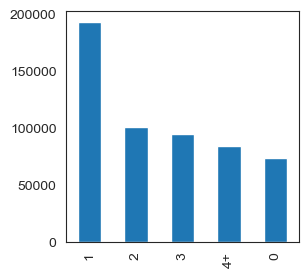

In [24]:
df.Stay_In_Current_City_Years.value_counts().plot(kind = 'bar', figsize = (3,3))
plt.show()

In [25]:
df.City_Category.value_counts(normalize = True) *100

B    42.038324
C    31.100438
A    26.861238
Name: City_Category, dtype: float64

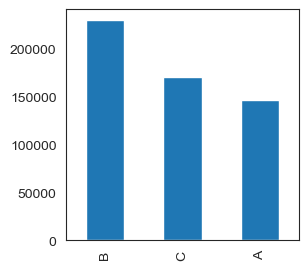

In [26]:
df.City_Category.value_counts().plot(kind = 'bar', figsize = (3,3))
plt.show()

In [27]:
df.Marital_Status.value_counts(normalize = True) *100

0    59.051391
1    40.948609
Name: Marital_Status, dtype: float64

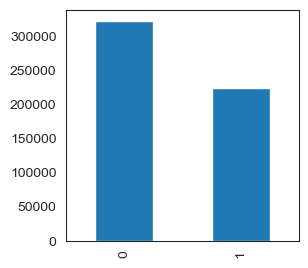

In [28]:
df.Marital_Status.value_counts().plot(kind = 'bar', figsize = (3,3))
plt.show()

75% of the users are Male

60% have age between 26-45

More users (42%) belong to B City_Category

More users (60%) are Single as compare to Married

35% users have stayed in a particular city for at least one year 



#### 'Purchase' distribution w.r.t other vaiables

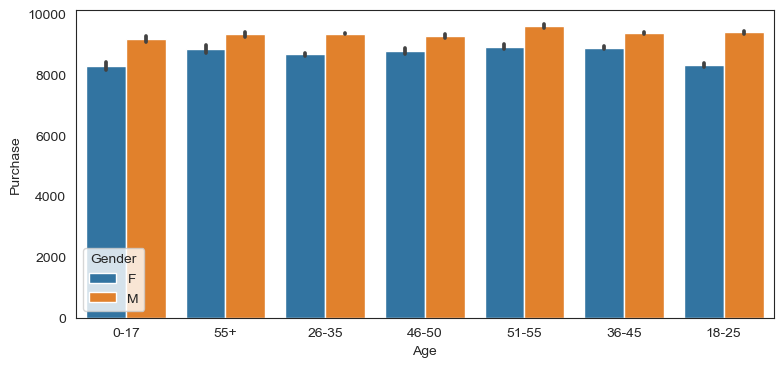

In [29]:
plt.figure(figsize = (9,4))
sns.barplot(data=df, x='Age', y='Purchase',hue="Gender")
plt.show()

Females accross all age categories have purchased slightly lesser as compared to males. Almost similar trend is observed for all age categories


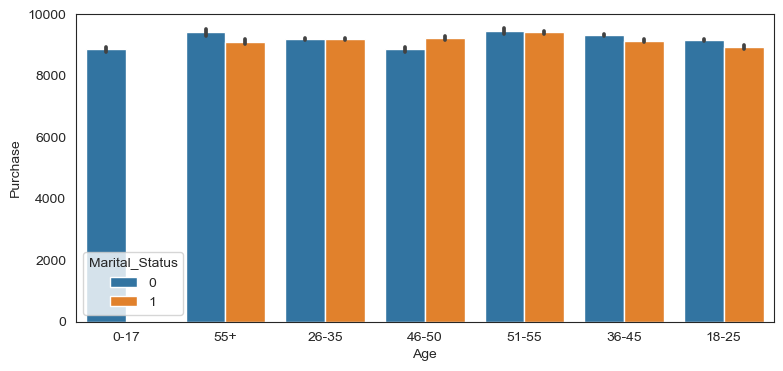

In [30]:
plt.figure(figsize = (9,4))
sns.barplot(data=df, x='Age', y='Purchase',hue="Marital_Status")
plt.show()

As from 0-17 year there are not married users so general buying trend is higher for unmarried users in that age range, which is quite understadable. For rest of the users there is no significant difference of marital status in purchasing pattern

#### Distribution of Product Category w.r.t other variables

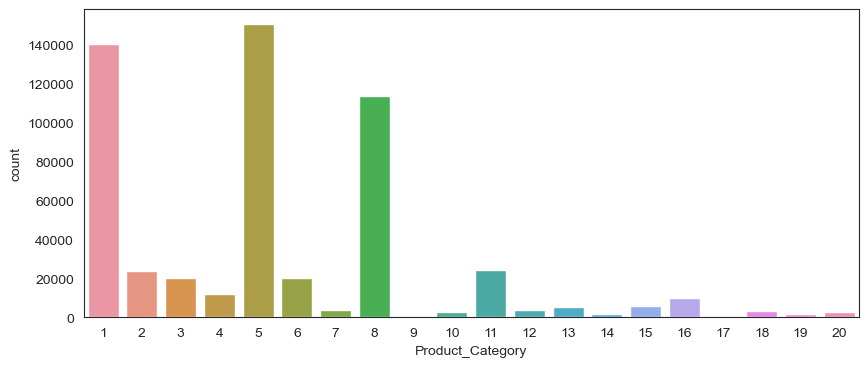

In [31]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Product_Category')
plt.show()

Product category 8, 5 and 1 are purchased more as compared to other categories

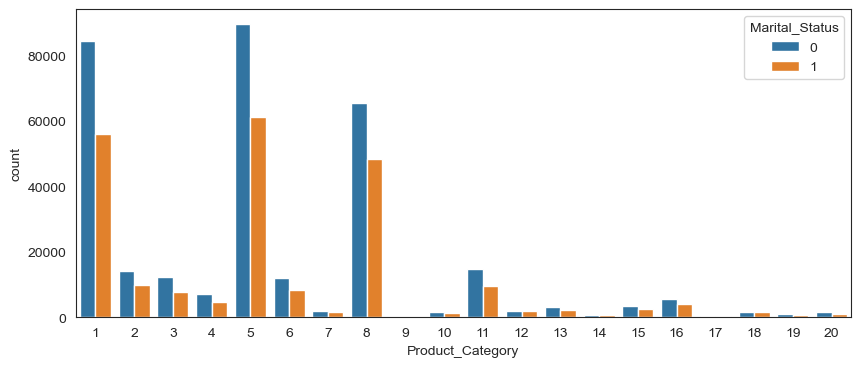

In [32]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Product_Category',hue='Marital_Status')
plt.show()

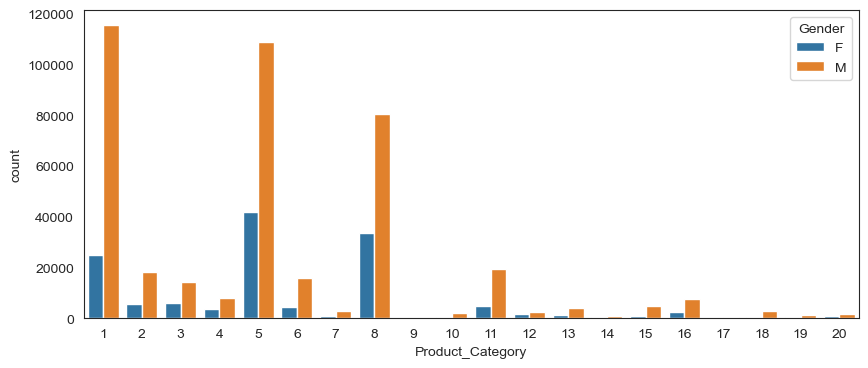

In [33]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Product_Category',hue='Gender')
plt.show()

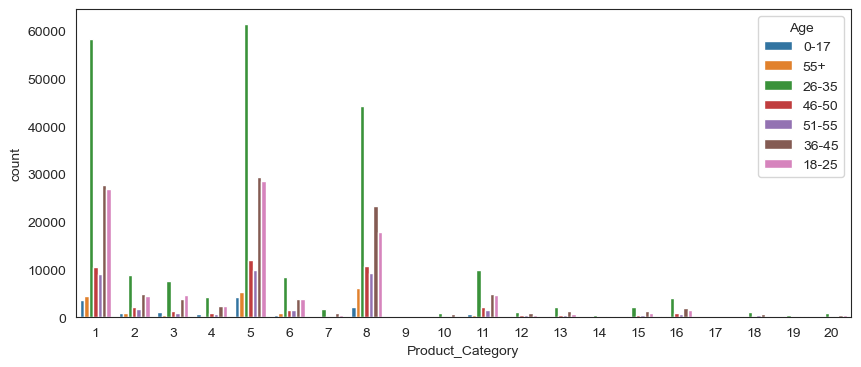

In [34]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Product_Category',hue='Age')
plt.show()

## How does gender affect the amount spent?

In [35]:
male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']

In [36]:
# Function to compute confidence interval
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = st.sem(data)  # Standard error of the mean
    h = std_err * st.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean, mean - h, mean + h

In [37]:
# Compute confidence interval for the entire dataset
male_ci = compute_confidence_interval(male_data)
female_ci = compute_confidence_interval(female_data)
print(f"Male CI: {np.round(male_ci,3)}")
print(f"Female CI: {np.round(female_ci,3)}")

Male CI: [9367.724 9352.432 9383.017]
Female CI: [8671.049 8646.109 8695.989]


In [38]:
# Check if confidence intervals overlap
def do_intervals_overlap(ci1, ci2):
    return not (ci1[2] < ci2[1] or ci2[2] < ci1[1])

overlap = do_intervals_overlap(male_ci, female_ci)

print(f"Do the confidence intervals overlap? {'Yes' if overlap else 'No'}")

# If they don't overlap, Walmart can make conclusions based on the difference
if not overlap:
    print("The average spending by males and females is significantly different.")
else:
    print("There is no significant difference in average spending between males and females.")

Do the confidence intervals overlap? No
The average spending by males and females is significantly different.


In [39]:
# Function to sample data and compute confidence interval

def sample_and_compute_ci(data, sample_size, confidence=0.95):
    if len(data) < sample_size:
        sample_size = len(data)  # Adjust sample size if it is larger than the population
    sample = np.random.choice(data, size=sample_size, replace=False)
    return sample, compute_confidence_interval(sample, confidence)


In [40]:
# Sample sizes to consider
sample_sizes = [300, 3000, 30000]

# Compute confidence intervals for different sample sizes and collect samples
results = {}
samples = {}
for size in sample_sizes:
    male_sample, male_ci_sample = sample_and_compute_ci(male_data, size)
    female_sample, female_ci_sample = sample_and_compute_ci(female_data, size)
    results[size] = {'Male': male_ci_sample, 'Female': female_ci_sample}
    samples[size] = {'Male': male_sample, 'Female': female_sample}


 Sample size: 300
  Male CI: (9306.426666666666, 8752.748097876836, 9860.105235456496)
  Female CI: (8938.43, 8369.709047788487, 9507.150952211514)
  Male CI Width: 1107.357
  Female CI Width: 1137.442
  Do the confidence intervals overlap? Yes


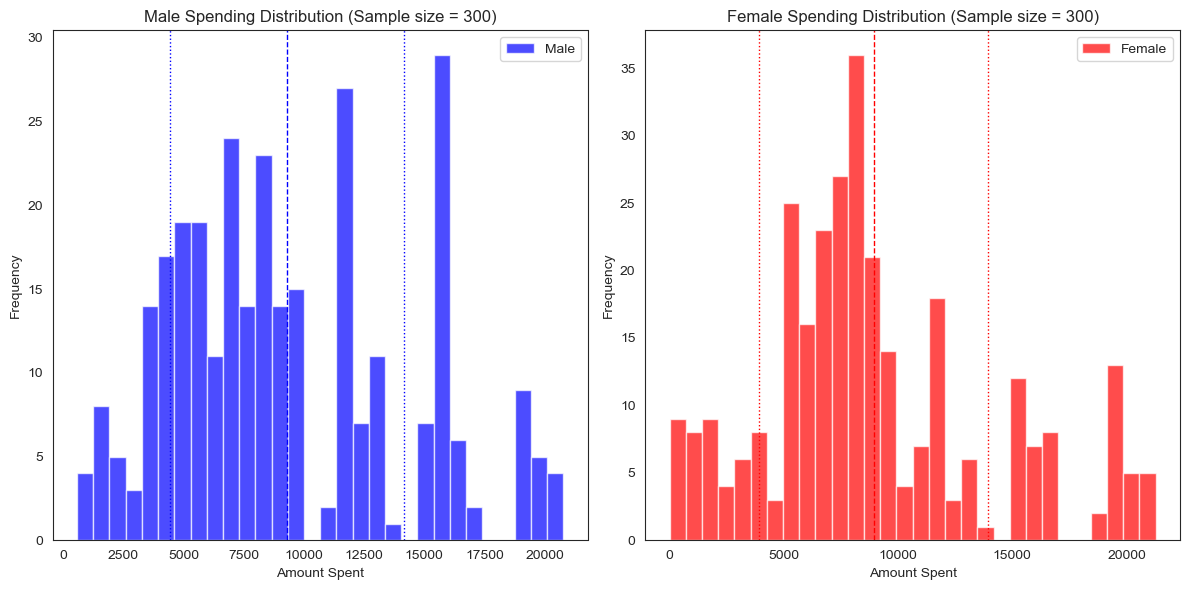

  Male Mean: 9306.427, Male Std Dev: 4865.01
  Female Mean: 8938.43, Female Std Dev: 4997.183

 Sample size: 3000
  Male CI: (9390.507333333333, 9213.256191024053, 9567.758475642613)
  Female CI: (8698.047, 8528.757990793203, 8867.336009206798)
  Male CI Width: 354.502
  Female CI Width: 338.578
  Do the confidence intervals overlap? No


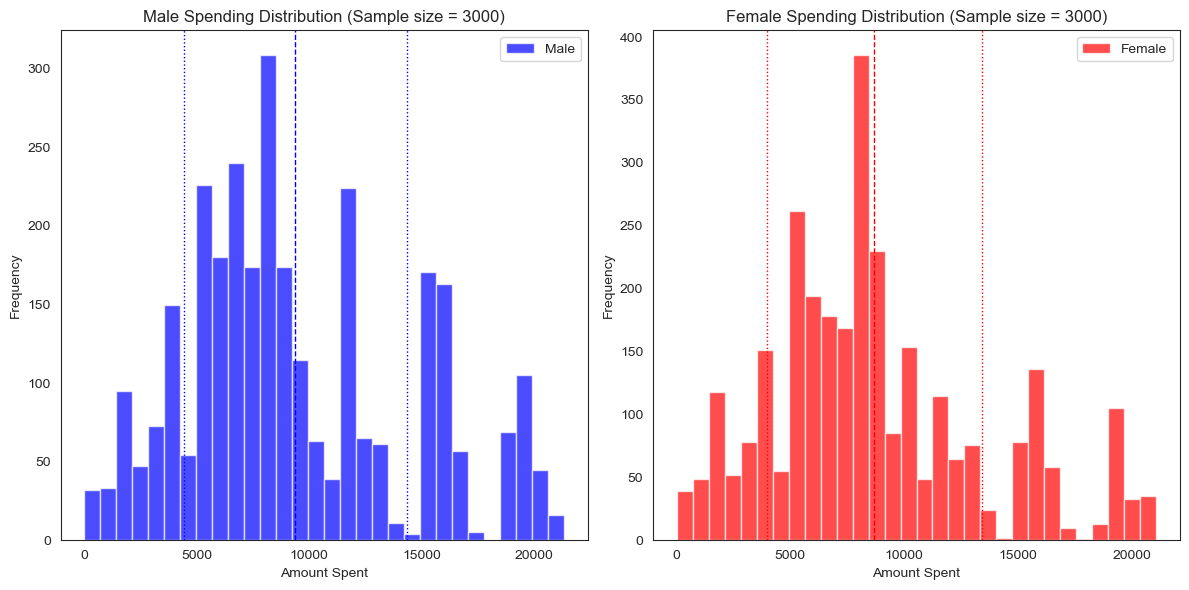

  Male Mean: 9390.507, Male Std Dev: 4950.555
  Female Mean: 8698.047, Female Std Dev: 4728.176

 Sample size: 30000
  Male CI: (9353.366033333334, 9296.638272582633, 9410.093794084034)
  Female CI: (8646.9813, 8594.190790724198, 8699.7718092758)
  Male CI Width: 113.456
  Female CI Width: 105.581
  Do the confidence intervals overlap? No


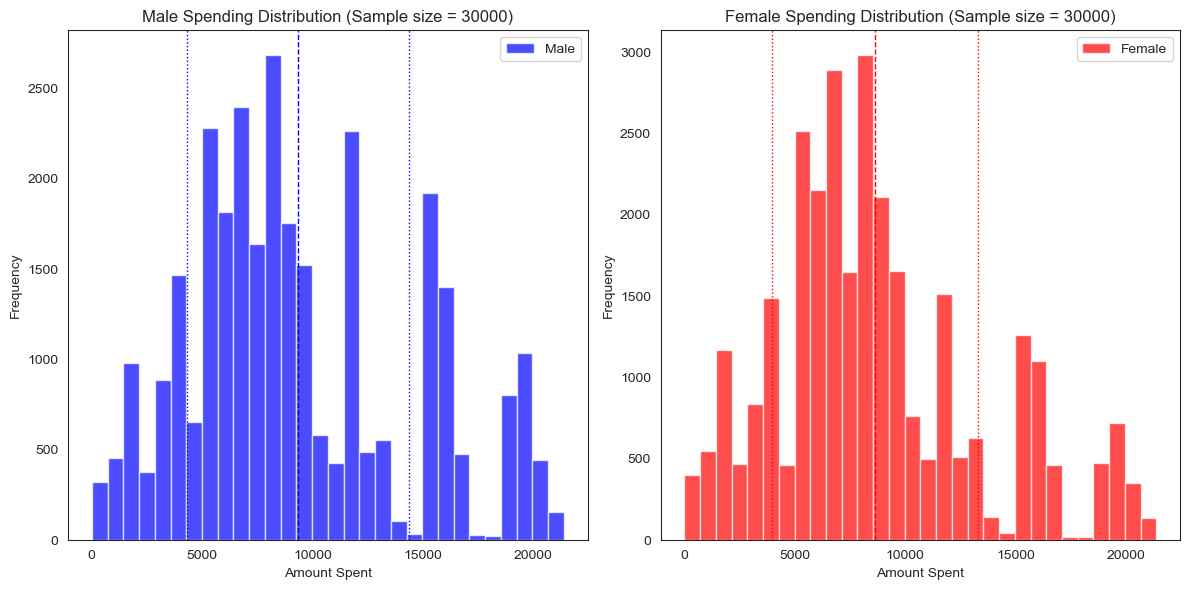

  Male Mean: 9353.366, Male Std Dev: 5012.835
  Female Mean: 8646.981, Female Std Dev: 4664.914


In [41]:
# Display the results and plot distributions
for size, ci in results.items():
    print("\n", f"Sample size: {size}")
    print(f"  Male CI: {ci['Male']}")
    print(f"  Female CI: {ci['Female']}")

    male_ci_width = np.round(ci['Male'][2] - ci['Male'][1], 3)
    female_ci_width = np.round(ci['Female'][2] - ci['Female'][1], 3)

    print(f"  Male CI Width: {male_ci_width}")
    print(f"  Female CI Width: {female_ci_width}")
    
    overlap = do_intervals_overlap(ci['Male'], ci['Female'])
    print(f"  Do the confidence intervals overlap? {'Yes' if overlap else 'No'}")
    
    # Plot distributions
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(samples[size]['Male'], bins=30, alpha=0.7, label='Male', color='blue')
    plt.axvline(np.mean(samples[size]['Male']), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(samples[size]['Male']) - np.std(samples[size]['Male']), color='blue', linestyle='dotted', linewidth=1)
    plt.axvline(np.mean(samples[size]['Male']) + np.std(samples[size]['Male']), color='blue', linestyle='dotted', linewidth=1)
    plt.title(f'Male Spending Distribution (Sample size = {size})')
    plt.xlabel('Amount Spent')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(samples[size]['Female'], bins=30, alpha=0.7, label='Female', color='red')
    plt.axvline(np.mean(samples[size]['Female']), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(samples[size]['Female']) - np.std(samples[size]['Female']), color='red', linestyle='dotted', linewidth=1)
    plt.axvline(np.mean(samples[size]['Female']) + np.std(samples[size]['Female']), color='red', linestyle='dotted', linewidth=1)
    plt.title(f'Female Spending Distribution (Sample size = {size})')
    plt.xlabel('Amount Spent')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print means and standard deviations
    male_mean = np.mean(samples[size]['Male'])
    female_mean = np.mean(samples[size]['Female'])
    male_std = np.std(samples[size]['Male'])
    female_std = np.std(samples[size]['Female'])
    
    print(f"  Male Mean: {np.round(male_mean, 3)}, Male Std Dev: {np.round(male_std, 3)}")
    print(f"  Female Mean: {np.round(female_mean, 3)}, Female Std Dev: {np.round(female_std, 3)}")

we can see that as we increased the sample size the distribution is better , more normal and the deviation is also less.

The larger the sample size, the more closely the sampling distribution will follow a normal distribution.

In [42]:
# Compute the width of the confidence intervals for the entire dataset
male_ci_width = np.round(male_ci[2] - male_ci[1], 3)
female_ci_width = np.round(female_ci[2] - female_ci[1],3)

print(f"Width of Male CI (Entire Dataset): {male_ci_width}")
print(f"Width of Female CI (Entire Dataset): {female_ci_width}")

Width of Male CI (Entire Dataset): 30.585
Width of Female CI (Entire Dataset): 49.879


Q1. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?

A1. CI computed using the entire dataset is wider for females as compared to males, this is because the data has 75% male users and 25% female users. Hence the Standard error for male user distribution is less so the distribution is narrow and female user distribution is wider.

Q2. How is the width of the confidence interval affected by the sample size?

A2. For both genders, as the sample size increases the width of CI descreses because n is inversely proportional to standard error.



Q3. Do the confidence intervals for different sample sizes overlap?

A3. For smaller sample size i.e 300, the CI for female and male overlap because they are wider intervals. For larger sample size overlap is not seen

Q4. How does the sample size affect the shape of the distributions of the
means?

A4. As the sample size increases, the shape of the distribution becomes more narrower. Larger sample sizes tend to make the sampling distribution of the mean more normal due to the Central Limit Theorem (CLT).

## How does Marital_Status affect the amount spent?

In [43]:
unmarried_data = df[df['Marital_Status'] == 0]['Purchase']
married_data = df[df['Marital_Status'] == 1]['Purchase']

In [44]:
# Compute confidence interval for the entire dataset
unmarried_ci = compute_confidence_interval(unmarried_data)
married_ci = compute_confidence_interval(married_data)
print(f"Unmarried CI: {np.round(unmarried_ci,3)}")
print(f"Married CI: {np.round(married_ci, 3)}")

Unmarried CI: [9201.582 9184.523 9218.64 ]
Married CI: [9187.04  9166.651 9207.43 ]


In [45]:
overlap = do_intervals_overlap(unmarried_ci, married_ci)

print(f"Do the confidence intervals overlap? {'Yes' if overlap else 'No'}")

# If they don't overlap, Walmart can make conclusions based on the difference
if not overlap:
    print("The average spending by singles and married users is significantly different.")
else:
    print("There is no significant difference in average spending between singles and married users.")

Do the confidence intervals overlap? Yes
There is no significant difference in average spending between singles and married users.


In [46]:
# Sample sizes to consider
sample_sizes = [300, 3000, 30000]

# Compute confidence intervals for different sample sizes and collect samples
results = {}
samples = {}
for size in sample_sizes:
    unmarried_sample, unmarried_ci_sample = sample_and_compute_ci(unmarried_data, size)
    married_sample, married_ci_sample = sample_and_compute_ci(married_data, size)
    results[size] = {'Unmarried': unmarried_ci_sample, 'Married': married_ci_sample}
    samples[size] = {'Unmarried': unmarried_sample, 'Married': married_sample}


 Sample size: 300
  Unmarried CI: (9435.773333333333, 8844.077276915536, 10027.46938975113)
  Married CI: (9160.126666666667, 8609.096070058138, 9711.157263275196)
  Unmarried CI Width: 1183.392
  Married CI Width: 1102.061
  Do the confidence intervals overlap? Yes


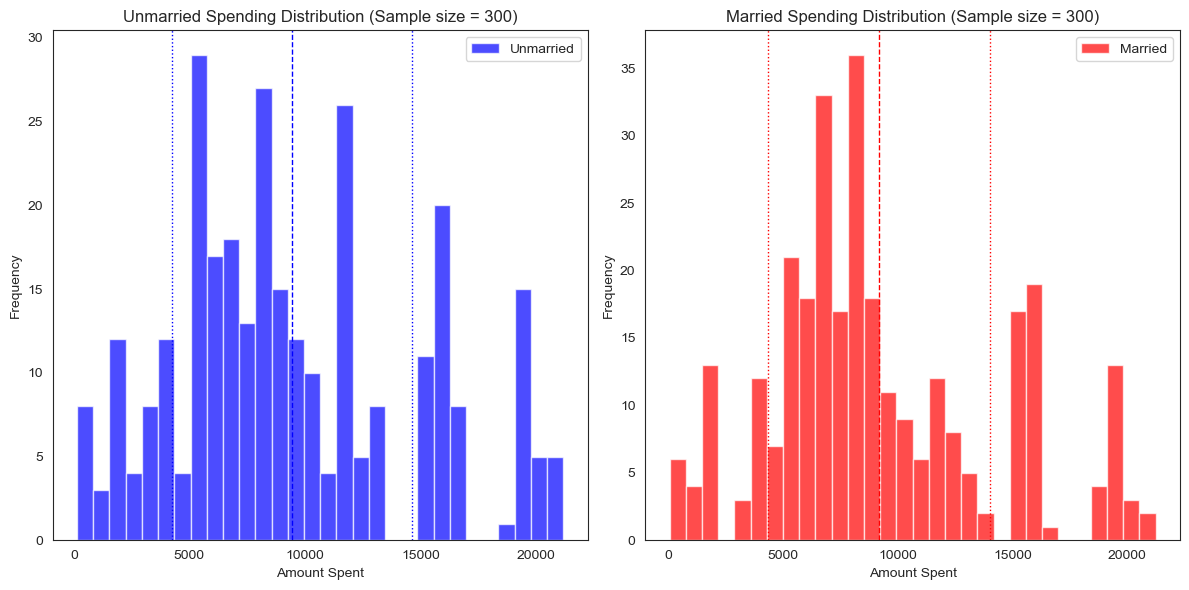

  Unmarried Mean: 9435.773, Unmarried Std Dev: 5199.058
  Married Mean: 9160.127, Married Std Dev: 4841.743

 Sample size: 3000
  Unmarried CI: (9082.589333333333, 8907.908864597131, 9257.269802069535)
  Married CI: (9123.663666666667, 8948.74229287802, 9298.585040455315)
  Unmarried CI Width: 349.361
  Married CI Width: 349.843
  Do the confidence intervals overlap? Yes


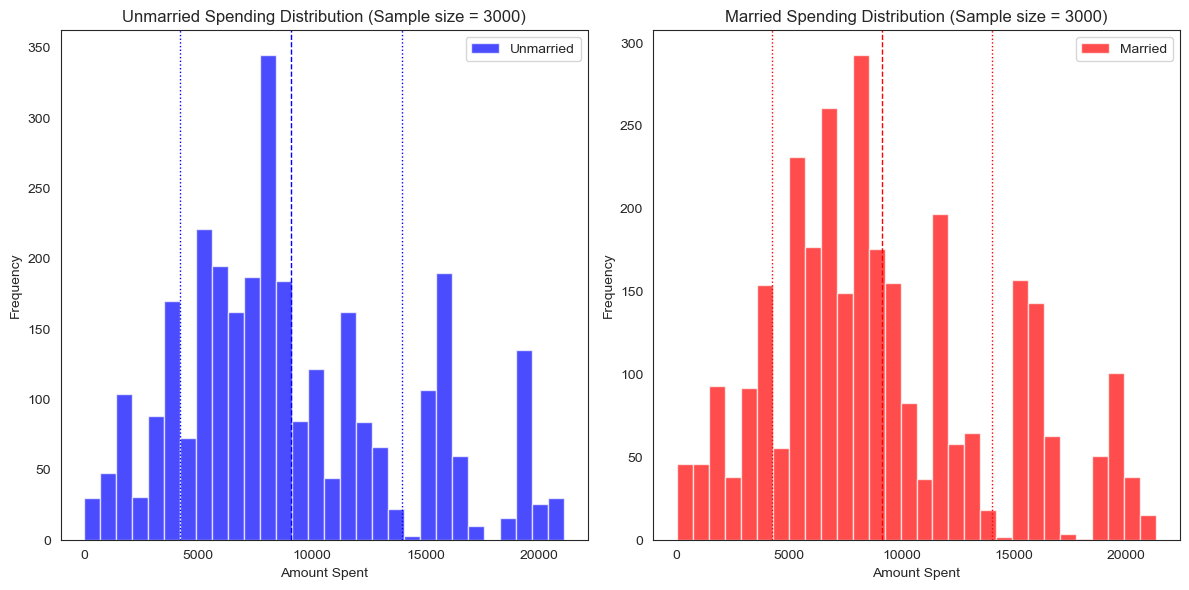

  Unmarried Mean: 9082.589, Unmarried Std Dev: 4878.757
  Married Mean: 9123.664, Married Std Dev: 4885.485

 Sample size: 30000
  Unmarried CI: (9205.1207, 9148.919769908638, 9261.321630091361)
  Married CI: (9176.955166666667, 9121.340300788173, 9232.57003254516)
  Unmarried CI Width: 112.402
  Married CI Width: 111.23
  Do the confidence intervals overlap? Yes


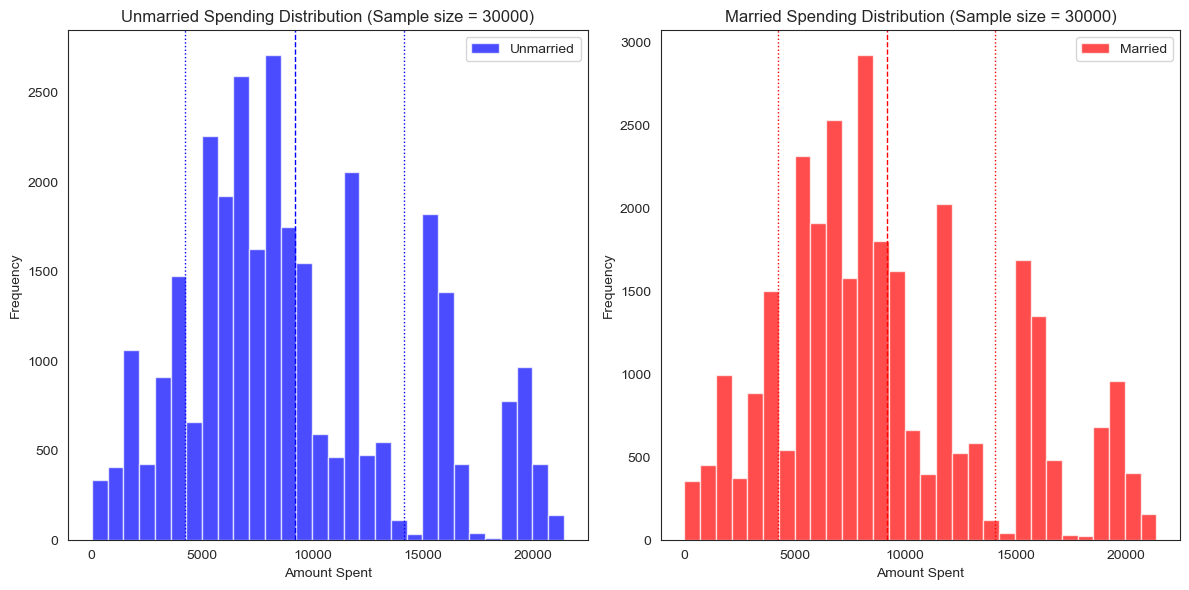

  Unmarried Mean: 9205.121, Unmarried Std Dev: 4966.281
  Married Mean: 9176.955, Married Std Dev: 4914.492


In [47]:
# Display the results and plot distributions
for size, ci in results.items():
    print("\n", f"Sample size: {size}")
    print(f"  Unmarried CI: {ci['Unmarried']}")
    print(f"  Married CI: {ci['Married']}")

    unmarried_ci_width = ci['Unmarried'][2] - ci['Unmarried'][1]
    married_ci_width = ci['Married'][2] - ci['Married'][1]

    print(f"  Unmarried CI Width: {np.round(unmarried_ci_width, 3)}")
    print(f"  Married CI Width: {np.round(married_ci_width, 3)}")
    
    overlap = do_intervals_overlap(ci['Unmarried'], ci['Married'])
    print(f"  Do the confidence intervals overlap? {'Yes' if overlap else 'No'}")
    
    # Plot distributions
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(samples[size]['Unmarried'], bins=30, alpha=0.7, label='Unmarried', color='blue')
    plt.axvline(np.mean(samples[size]['Unmarried']), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(samples[size]['Unmarried']) - np.std(samples[size]['Unmarried']), color='blue', linestyle='dotted', linewidth=1)
    plt.axvline(np.mean(samples[size]['Unmarried']) + np.std(samples[size]['Unmarried']), color='blue', linestyle='dotted', linewidth=1)
    plt.title(f'Unmarried Spending Distribution (Sample size = {size})')
    plt.xlabel('Amount Spent')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(samples[size]['Married'], bins=30, alpha=0.7, label='Married', color='red')
    plt.axvline(np.mean(samples[size]['Married']), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(samples[size]['Married']) - np.std(samples[size]['Married']), color='red', linestyle='dotted', linewidth=1)
    plt.axvline(np.mean(samples[size]['Married']) + np.std(samples[size]['Married']), color='red', linestyle='dotted', linewidth=1)
    plt.title(f'Married Spending Distribution (Sample size = {size})')
    plt.xlabel('Amount Spent')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print means and standard deviations
    unmarried_mean = np.mean(samples[size]['Unmarried'])
    married_mean = np.mean(samples[size]['Married'])
    unmarried_std = np.std(samples[size]['Unmarried'])
    married_std = np.std(samples[size]['Married'])
    
    print(f"  Unmarried Mean: {np.round(unmarried_mean,3)}, Unmarried Std Dev: {np.round(unmarried_std,3)}")
    print(f"  Married Mean: {np.round(married_mean,3)}, Married Std Dev: {np.round(married_std,3)}")



In [48]:
# Compute the width of the confidence intervals for the entire dataset
unmarried_ci_width = unmarried_ci[2] - unmarried_ci[1]
married_ci_width = married_ci[2] - married_ci[1]

print(f"Width of Unmarried CI (Entire Dataset): {unmarried_ci_width}")
print(f"Width of Married CI (Entire Dataset): {married_ci_width}")

Width of Unmarried CI (Entire Dataset): 34.117267962854385
Width of Married CI (Entire Dataset): 40.77898023360831


Q1. Is the confidence interval computed using the entire dataset wider for
one of the marital status? Why is this the case?

A1. CI computed using the entire dataset is wider for married users as compared to singles, this is because the data has 60% singles and 40% married users. Hence the Standard error for singles distribution is less so the distribution is narrow and married user distribution is wider.

Q2. How is the width of the confidence interval affected by the sample size?

A2. For both singles and married users, as the sample size increases the width of CI descreses because n is inversely proportional to standard error.

Q3. Do the confidence intervals for different sample sizes overlap?

A3. The CI for singles and married users overlap for all sample sizes, because the means for both group is very nearby

Q4. How does the sample size affect the shape of the distributions of the
means?

A4. As the sample size increases, the shape of the distribution becomes more narrower. Larger sample sizes tend to make the sampling distribution of the mean more normal due to the Central Limit Theorem (CLT).

## How does Age affect the amount spent?

In [49]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [50]:
g1_data = df[df['Age'] =='0-17' ]['Purchase']
g2_data = df[df['Age'] =='18-25' ]['Purchase']
g3_data = df[df['Age'] =='26-35' ]['Purchase']
g4_data = df[df['Age'] =='36-45' ]['Purchase']
g5_data = df[df['Age'] =='46-50' ]['Purchase']
g6_data = df[df['Age'] =='51-55' ]['Purchase']
g7_data = df[df['Age'] =='55+' ]['Purchase']

In [51]:
# Define the age groups and their corresponding data
age_groups = {
    '0-17': g1_data,
    '18-25': g2_data,
    '26-35': g3_data,
    '36-45': g4_data,
    '46-50': g5_data,
    '51-55': g6_data,
    '55+': g7_data
}

# Compute confidence intervals and their widths for each age group
age_group_cis = {}
age_group_ci_widths = {}
for age_group, data in age_groups.items():
    ci = compute_confidence_interval(data)
    width = ci[2] - ci[1]
    age_group_cis[age_group] = ci
    age_group_ci_widths[age_group] = width

# Print confidence intervals and their widths for each age group
for age_group in age_groups.keys():
    ci = age_group_cis[age_group]
    width = age_group_ci_widths[age_group]
    print('\n',f"{age_group} CI: {np.round(ci,3)}, Width: {np.round(width,3)}")



 0-17 CI: [8867.447 8787.03  8947.864], Width: 160.834

 18-25 CI: [9124.032 9093.07  9154.994], Width: 61.924

 26-35 CI: [9193.47  9172.775 9214.165], Width: 41.39

 36-45 CI: [9254.202 9225.003 9283.402], Width: 58.399

 46-50 CI: [9128.985 9084.231 9173.739], Width: 89.507

 51-55 CI: [9423.122 9373.439 9472.805], Width: 99.366

 55+ CI: [9216.65  9151.391 9281.909], Width: 130.518


In [52]:
# Separate the data by age groups
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
ci_results = {}

for age_group in age_groups:
    age_group_data = df[df['Age'] == age_group]['Purchase']
    age_group_ci = compute_confidence_interval(age_group_data)
    ci_results[age_group] = age_group_ci

In [53]:
# Check if confidence intervals overlap for different age groups
overlap = False
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        overlap = do_intervals_overlap(ci_results[group1], ci_results[group2])
        print('\n',f"Do the confidence intervals for {group1} and {group2} overlap? {'Yes' if overlap else 'No'}")

        if not overlap:
            print(f"The average spending between {group1} and {group2} age groups is significantly different.")
        else:
            print(f"There is no significant difference in average spending between {group1} and {group2} age groups.")


 Do the confidence intervals for 0-17 and 18-25 overlap? No
The average spending between 0-17 and 18-25 age groups is significantly different.

 Do the confidence intervals for 0-17 and 26-35 overlap? No
The average spending between 0-17 and 26-35 age groups is significantly different.

 Do the confidence intervals for 0-17 and 36-45 overlap? No
The average spending between 0-17 and 36-45 age groups is significantly different.

 Do the confidence intervals for 0-17 and 46-50 overlap? No
The average spending between 0-17 and 46-50 age groups is significantly different.

 Do the confidence intervals for 0-17 and 51-55 overlap? No
The average spending between 0-17 and 51-55 age groups is significantly different.

 Do the confidence intervals for 0-17 and 55+ overlap? No
The average spending between 0-17 and 55+ age groups is significantly different.

 Do the confidence intervals for 18-25 and 26-35 overlap? No
The average spending between 18-25 and 26-35 age groups is significantly diffe

In [54]:
# Separate the data by age groups
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
age_group_data = {}

for age_group in age_groups:
    age_group_data[age_group] = df[df['Age'] == age_group]['Purchase']

# Sample sizes to consider
sample_sizes = [300, 3000, 30000]

# Compute confidence intervals for different sample sizes and collect samples
results = {}
samples = {}

for size in sample_sizes:
    for age_group in age_groups:
        sample, ci_sample = sample_and_compute_ci(age_group_data[age_group], size)
        if size not in results:
            results[size] = {}
            samples[size] = {}
        results[size][age_group] = ci_sample
        samples[size][age_group] = sample

In [55]:
# Display the results 
for size, ci in results.items():
    print("\n", "\n", '\n',  f"Sample size: {size}")
    for age_group in age_groups:
        print('\n', f"  {age_group} CI: {ci[age_group]}")

        # Calculate width of confidence interval
        ci_width = ci[age_group][2] - ci[age_group][1]
        print(f"    {age_group} CI Width: {np.round(ci_width, 3)}")
        
        # Calculate overlap with the next age group, if applicable
        if age_group != age_groups[-1]:  # Ensure there is a next group
            next_age_group = age_groups[age_groups.index(age_group) + 1]
            overlap = do_intervals_overlap(ci[age_group], ci[next_age_group])
            print(f"    Do the confidence intervals overlap with {next_age_group}? {'Yes' if overlap else 'No'}")
        
        # Print means and standard deviations
        age_group_mean = np.mean(samples[size][age_group])
        age_group_std = np.std(samples[size][age_group])
        
        print(f"    {age_group} Mean: {np.round(age_group_mean, 3)}, {age_group} Std Dev: {np.round(age_group_std, 3)}")


 
 
 Sample size: 300

   0-17 CI: (9152.826666666666, 8583.287394134804, 9722.365939198527)
    0-17 CI Width: 1139.079
    Do the confidence intervals overlap with 18-25? Yes
    0-17 Mean: 9152.827, 0-17 Std Dev: 5004.373

   18-25 CI: (9513.22, 8955.137075107876, 10071.302924892123)
    18-25 CI Width: 1116.166
    Do the confidence intervals overlap with 26-35? Yes
    18-25 Mean: 9513.22, 18-25 Std Dev: 4903.71

   26-35 CI: (8449.513333333334, 7918.123678764043, 8980.902987902626)
    26-35 CI Width: 1062.779
    Do the confidence intervals overlap with 36-45? Yes
    26-35 Mean: 8449.513, 26-35 Std Dev: 4669.164

   36-45 CI: (9135.566666666668, 8585.972642373506, 9685.160690959829)
    36-45 CI Width: 1099.188
    Do the confidence intervals overlap with 46-50? Yes
    36-45 Mean: 9135.567, 36-45 Std Dev: 4829.12

   46-50 CI: (9417.453333333333, 8846.250658283367, 9988.6560083833)
    46-50 CI Width: 1142.405
    Do the confidence intervals overlap with 51-55? Yes
    46-50 

In [56]:
# Compute the width of the confidence intervals for the entire dataset for age groups
for age_group, ci in age_group_cis.items():
    ci_width = ci[2] - ci[1]
    print(f"Width of {age_group} CI (Entire Dataset): {np.round(ci_width, 3)}")

Width of 0-17 CI (Entire Dataset): 160.834
Width of 18-25 CI (Entire Dataset): 61.924
Width of 26-35 CI (Entire Dataset): 41.39
Width of 36-45 CI (Entire Dataset): 58.399
Width of 46-50 CI (Entire Dataset): 89.507
Width of 51-55 CI (Entire Dataset): 99.366
Width of 55+ CI (Entire Dataset): 130.518


## Insights and Recommendations

Based on the analysis of the confidence intervals for the average amount spent by males and females, the intervals do not overlap, indicating a statistically significant difference in the average spending between these two groups.

Male Confidence Interval: [9352.432, 9383.017]

Female Confidence Interval: [8646.109, 8695.989]

#### Leveraging the Conclusion for Walmart

##### 1. **Targeted Marketing Campaigns:**
   - **For Males**: If males are spending more, Walmart can design marketing campaigns that highlight high-value or premium products. Offering loyalty programs or incentives for higher spending thresholds might also encourage more spending.
   - **For Females**: If females are spending less, Walmart can promote cost-effective products, discounts, and bundled offers. Personalized marketing strategies based on purchase history can help in increasing the average spend.

##### 2. **Product Assortment and Inventory Management:**
   - **For Males**: Stock more of the products that males tend to buy and ensure they are easily accessible. Identify categories where males spend more and focus on expanding these categories.
   - **For Females**: Understand the categories where females are spending and optimize the inventory to ensure a variety of choices within these categories. Introduce products that might appeal more to females to encourage higher spending.

##### 3. **In-Store Layout and Online Experience:**
   - **For Males**: Create in-store displays that are visually appealing and easy to navigate for the products males are more likely to buy. Online, ensure that recommendations and ads are tailored based on male spending patterns.
   - **For Females**: Ensure that the store layout is welcoming and that products are easily discoverable. Online, use algorithms to recommend products that are frequently bought by females and highlight deals and discounts.

##### 4. **Pricing Strategies:**
   - **For Males**: If the data shows that males are less price-sensitive, Walmart can maintain or even slightly increase prices on high-demand products.
   - **For Females**: Implement competitive pricing strategies, including discounts, sales, and special offers, to attract more female customers.

##### 5. **Promotions and Loyalty Programs:**
   - **For Males**: Develop promotions that reward high spending, such as tiered loyalty programs where the rewards increase with spending.
   - **For Females**: Create promotions that focus on frequent purchases, such as punch cards for free items after a certain number of purchases or discounts on future purchases.

##### 6. **Understanding Customer Needs:**
   - Conduct further research to understand the underlying reasons for the spending differences. Use surveys, focus groups, and purchase data analysis to gain insights into what drives male and female purchasing behaviors.


The confidence intervals for the average amount spent by married and unmarried users overlap. Hence there is no significant difference in average spending between singles and married users based on the data.

Unmarried users Confidence Interval : [9184.523, 9218.64 ]

Married users confidence Interval: [9166.651, 9207.43 ]

#### Leveraging the Conclusion for Walmart

1. **Targeted Marketing Strategies:**
   - **Segmented Campaigns:** Develop personalized marketing strategies that cater to both married and unmarried customers based on their spending behaviors.
   - **Promotions:** Offer targeted promotions such as family packages for married customers and singles' exclusive deals to attract both segments.

2. **Product Assortment and Stock Management:**
   - **Diverse Product Offerings:** Ensure a diverse range of products that appeal to both singles and families.
   - **Inventory Optimization:** Adjust inventory levels based on purchasing patterns observed in both groups.

3. **Customer Experience Enhancement:**
   - **Personalization:** Improve online and in-store personalization based on customer marital status data.
   - **Customer Service:** Train staff to provide tailored assistance to both segments, understanding their distinct needs.

4. **Loyalty and Engagement Programs:**
   - **Rewards Programs:** Implement loyalty programs that offer rewards based on spending behavior, encouraging repeat purchases from both married and unmarried customers.
   - **Feedback Mechanisms:** Gather feedback from both segments to continuously refine offerings and services.

5. **Market Research and Data Analysis:**
   - **Continuous Analysis:** Regularly analyze customer data to identify evolving trends and preferences within each segment.
   - **Surveys and Focus Groups:** Conduct surveys and focus groups to gather deeper insights into the spending habits and preferences of married and unmarried customers.



Based on the analysis of confidence intervals for average spending across different age groups:

- **No Significant Difference (Overlap) in Average Spending:**
  - Between 18-25 and 46-50 age groups
  - Between 18-25 and 55+ age groups
  - Between 26-35 and 46-50 age groups
  - Between 26-35 and 55+ age groups
  - Between 36-45 and 55+ age groups
  - Between 46-50 and 55+ age groups

- **Significant Difference (No Overlap) in Average Spending:**
  - Between 0-17 and all other age groups (18-25, 26-35, 36-45, 46-50, 51-55, 55+)
  - Between 18-25 and 51-55 age groups
  - Between 26-35 and 51-55 age groups
  - Between 36-45 and 46-50 age groups
  - Between 36-45 and 51-55 age groups
  - Between 46-50 and 51-55 age groups
  - Between 51-55 and 55+ age groups

#### Leveraging the conclusion for Walmart:
1. **Targeted Marketing and Product Offerings:**
   - **Age-Specific Promotions:** Develop targeted promotional campaigns for age groups where significant spending differences exist. For example, tailor discounts and offers to attract younger (0-17) or middle-aged (36-45) customers.
   - **Product Assortment:** Adjust product offerings to cater to the spending preferences observed in each age group. Ensure diverse ranges that appeal to both high-spending and budget-conscious segments.

2. **Enhanced Customer Engagement:**
   - **Personalized Customer Experience:** Implement personalized marketing strategies and customer service initiatives based on age demographics to enhance engagement and loyalty.
   - **Feedback Mechanisms:** Collect feedback from different age groups to understand their specific needs and preferences better.

3. **Operational Adjustments:**
   - **Inventory and Stock Management:** Optimize inventory levels based on observed spending patterns across age groups to meet demand effectively.
   - **Staff Training:** Train staff to understand and cater to the needs of diverse age groups, ensuring excellent customer service and satisfaction.

4. **Data-Driven Decision Making:**
   - **Continuous Analysis:** Regularly analyze customer spending data by age group to stay updated with changing trends and preferences.
   - **Market Research:** Conduct periodic market research to identify emerging opportunities and adapt strategies accordingly.



By leveraging these insights and recommendations, Walmart can effectively tailor its strategies to enhance customer satisfaction, drive sales, and foster loyalty across diverse customer segments.